## <b> Evaluation Project 5 Census Income Project </b>
<b><em> By: Mr.Lokesh Baviskar </em></b>

<b><em> Batch: 1833 </em></b>

###  <b> Problem Statement:</b>
<b><em> This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). <u>The prediction task is to determine whether a person makes over $50K a year.</u></em></b>

### Description of fnlwgt (final weight)

<b>The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.</b>



<b>To download the dataset, use the link given below. 

Downlaod Files:</b>
    
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

/Users/aditya/opt/anaconda3/envs/datascience_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 Importing CSV file

In [2]:
df=pd.read_csv('census_income.csv')

In [3]:
print('No of Rows & Columns :',df.shape)
# print('No of Columns:',df.shape[1])


No of Rows & Columns : (32560, 15)


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

####  Observation:
<b> Most of the column names are self-explanatory rest are explained below :</b>
- Fnlwgt: sampling weight
- Education_num: number of years of education in total
- Capital_gain/Capital_loss: income from investment sources other than salary/wages

# Statistical Analysis

 <b>  Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Since dataset is large,  Let check for any entry which is repeated or duplicated in dataset. </b>

In [6]:
# Will check if there exists any duplicate entry or duplicate row with same value
df.duplicated().sum() 

24

<b> If we just check CSV File we can find that there are some missing value in dataset which shown fill with '?' 
    
Let check how many question mark (" ?") inside dataset.
</b>

In [7]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<b> Let replace ' ?' with np.NaN </b>

In [8]:
df=df.replace(' ?',np.NaN)

<b> Let check if any whitespace, 'NA' or '-' exist in dataset. </b>

In [9]:
df.isin([' ','NA','-']).sum().any()

False

#### Comment:
1. We have Replace ' ?' with np.NaN
2. No whitespace, NA, '-' exist in dataset.

<b> Let drop duplicated entry from dataset before checking null values. </b>

In [10]:
df.drop_duplicates(keep='last', inplace=True)

In [11]:
df.shape

(32536, 15)

## Missing value check 

<AxesSubplot:>

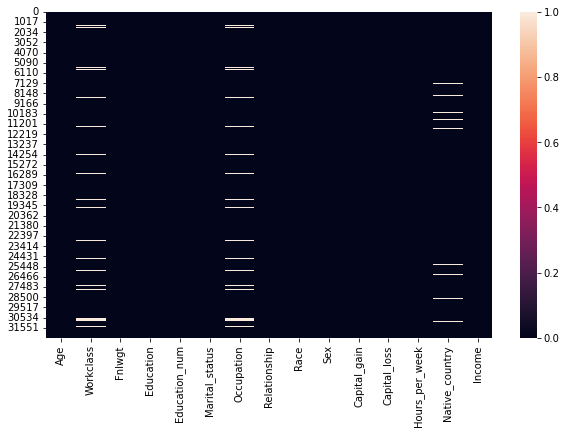

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

#### Comment:
- There are missing values in Occupation,workclass, Native country.

In [13]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [15]:
# Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Observation:
- There are 32536 rows , 14 Independent columns and 1 Target feature.
- Age,Fnlwgt, education_num, capital gain, capital loss, hours per week are Numerical variable and having int64 datatypes.
- Work class, Education,Marital status, occupation, relationship, race,sex,native country are categorical feature with object datatypes.

In [16]:
# Separate data in numerical and categorical variable
Numerical_data=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category__data=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

## Missing value imputation

<b> Occupation, Workclass and Native Country are categorical variable so we can imputate them with mode of that feature.</b>

In [17]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

### Missing Value Check After Imputataion

In [18]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


#### Observation :
<b> Finally, No Missing Value is Present.

We are Now Yes To Go Further !</b>

### Statistical Matrix

<AxesSubplot:>

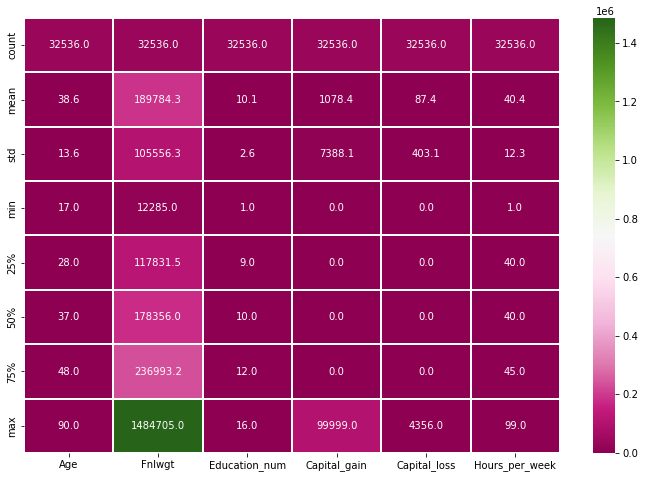

In [19]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


#### Observation:
- The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

### Start Exploring categorial features with Enlisting Value counts & Sub-categories 

In [22]:
for i in Category__data:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

# Exploratory Data Analysis 

### Start EDA by analysing our target variable first.

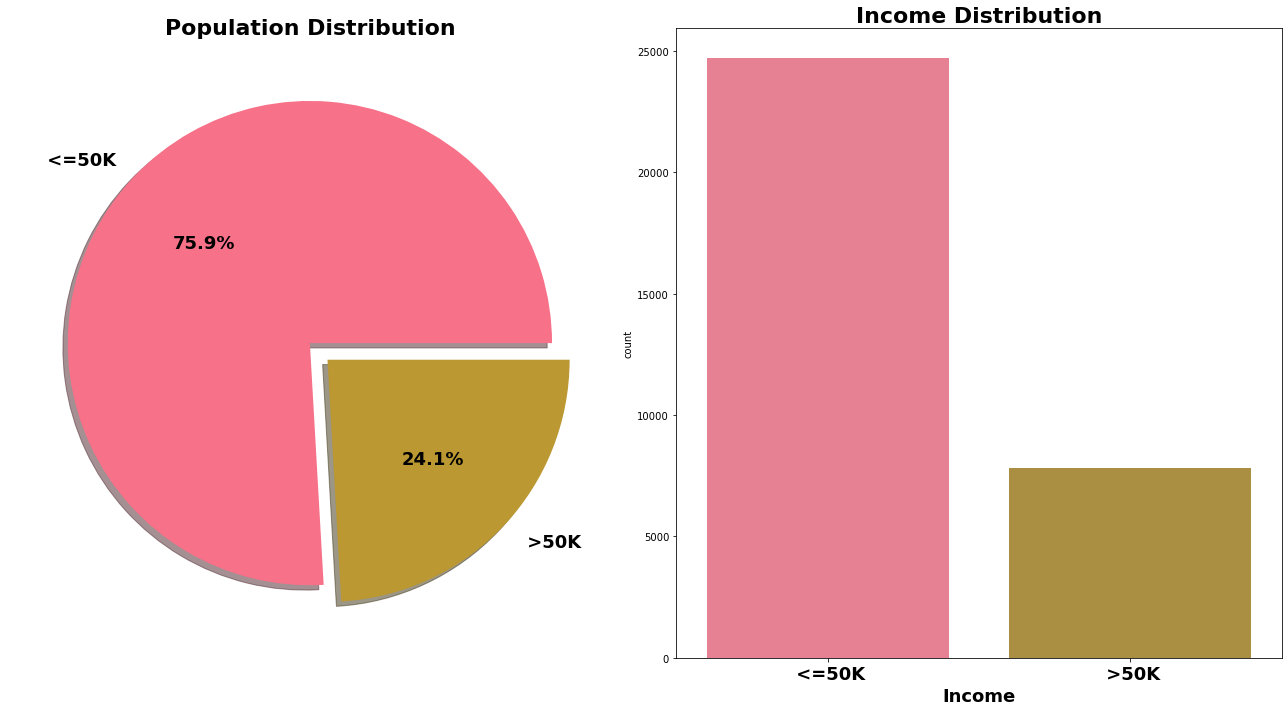

In [23]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation :
- 75.9 % population (24697 peoples) have income less than 50K.
- Our task is to predict income and we see that target variable income is imbalanced.

<b> Let check each feature against Target variable to gain more insight into data before finding answer of important questions. </b>

### Exploration of Age

In [24]:
print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')
print('Average Age:', df['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [25]:
# Defining function to create new columns to classify people according different age gruop
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'

In [26]:
# Calling function age_group
df['age_group']=df['Age'].apply(age_group)

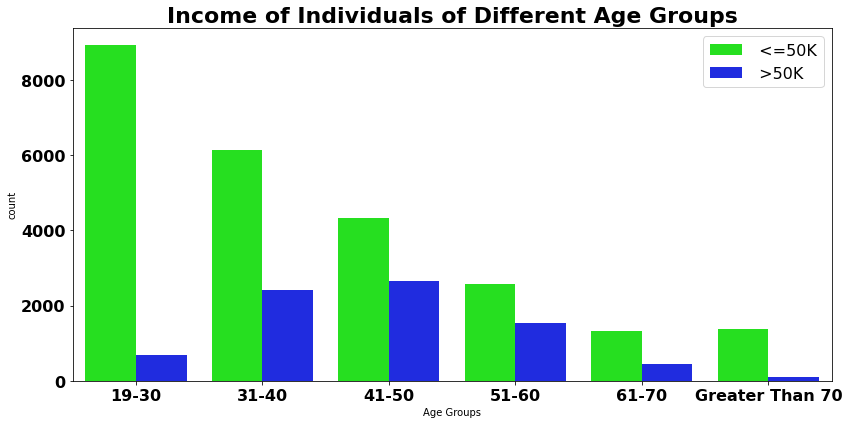

In [27]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
p = sns.countplot(df['age_group'], hue=df['Income'], palette='hsv', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=22, fontweight='bold')
p.set_xlabel('Age Groups')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

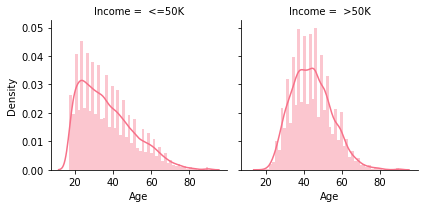

In [28]:
# Distribution of age with income categories
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

#### Observation:
<b> Here comes an interesting observation. We already know that only 24% people earnings more than 50K dollors and this plot tell us which age group then belong. </b>
- almost 10 % people in age group of 19-30 earns more than 50 K dollars and this count drop even more in old peoples having age greater than 70.<b> Might be some lucky old ones has created good Retirement Plan compare to rest old peoples.</b>
- We can find maximum people earning more than 50K dollors belong to age group 41-50 & 51-60. <u> It will be interesting to find out which profession lead this income to this category.</u>

### So let dive into workclass and see what insight we get from there.

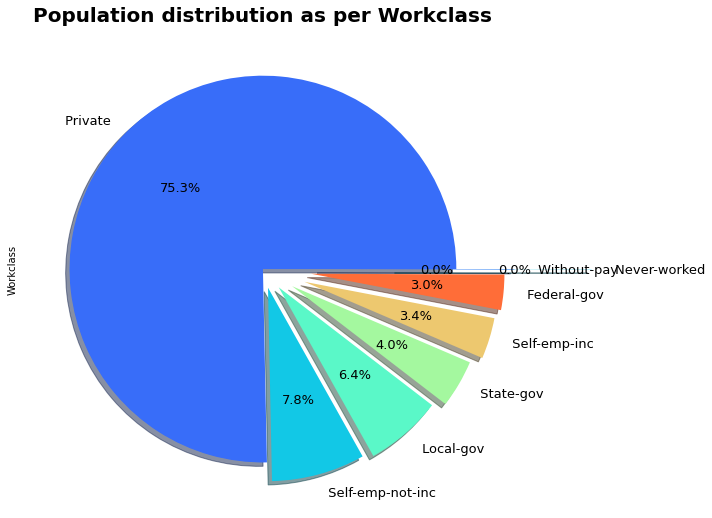

In [29]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

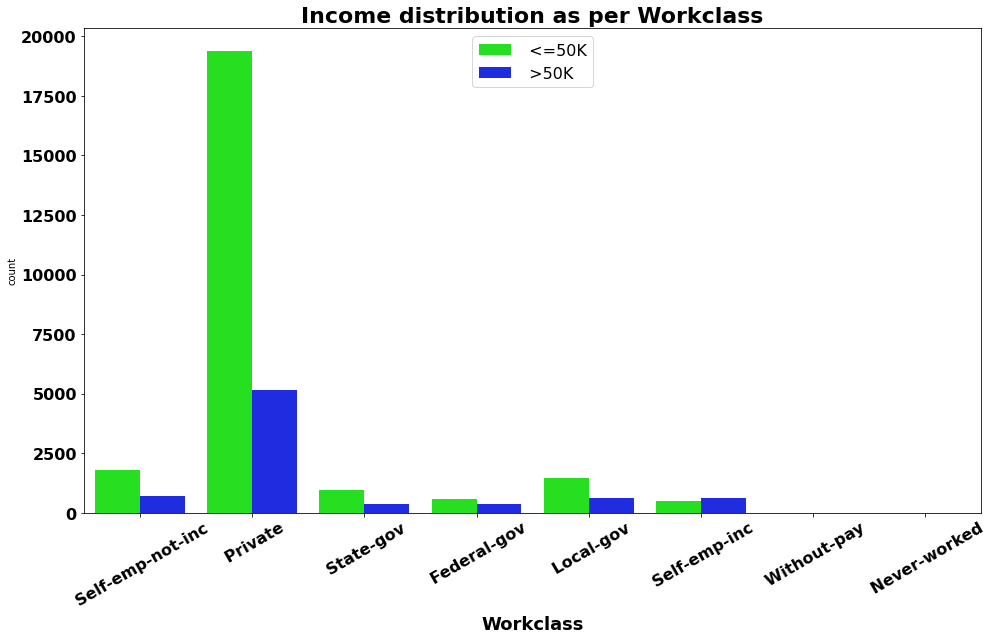

In [30]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Workclass'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

In [31]:
pd.crosstab(df['Income'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


#### Observation :
- 75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %
- <b><em>Interseting observation comes with <u> Self-Employed Incorporated </u> category where the number of people who earn more than 50K dollars exceed those earning less than it ! </em></b>
    
- There is significant difference between private sector employees income where <u> less than 25 % people earn more than 50K dollars an year.</u> 
- Another quite surprising insight comes from Federal Goverment countplot where <b><em> We can see very minute difference between the number of people whose income is more or less than 50K dollars an year.</em></b> Same goes with state goverment with some difference. 
    
- Yes there exist category for who never worked and Working without pay but very few people belong to it.These people may be unempolyeed or colleges students. But Number is less And thats Good !!!

<b><em>Certainly Goverment Emplyoees have high wages compare to private !!!</em></b>

### Education Vs Income

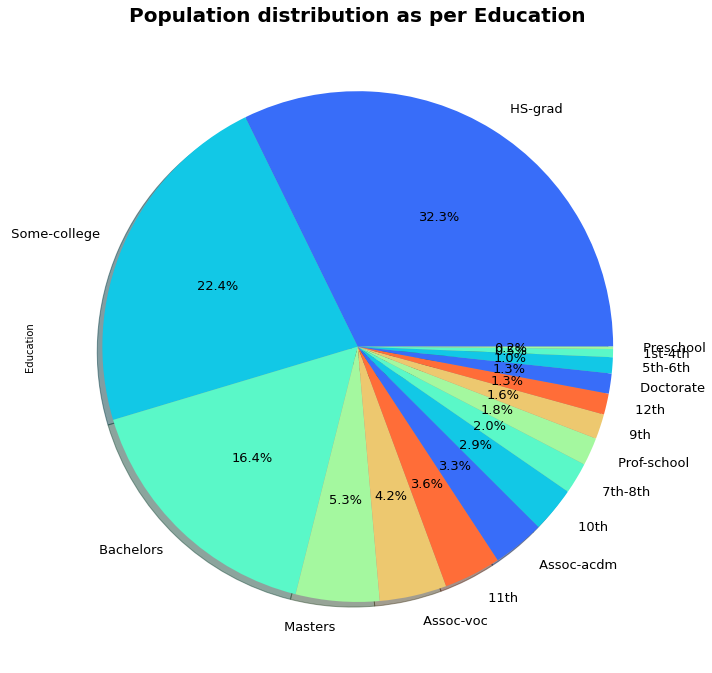

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Education', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

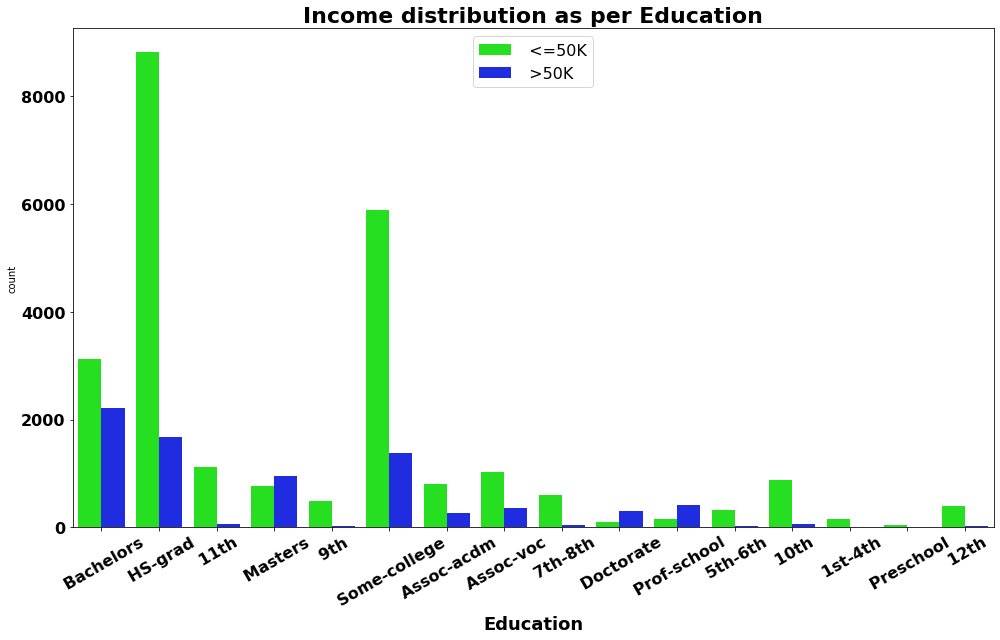

In [33]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Education'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

#### Observation:
- Out of all population 32.3% people with HS-Grad education which is most prevalent education level.
- 5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.
- There are very handful people who earn more than 50 K dollars having education below 12th level.
- Maximum number of people who earn more than 50K dollars are Bachelors degree holder.
- <b> Here comes interesting observation about income of highly educated people. In case of people belonging to Masters, Doctorate and Prof-School category in the education level, the number people earning more than 50K dollars an year outnumber than the number of people earning less than it.</b>
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

In [34]:
pd.crosstab(df['Education'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


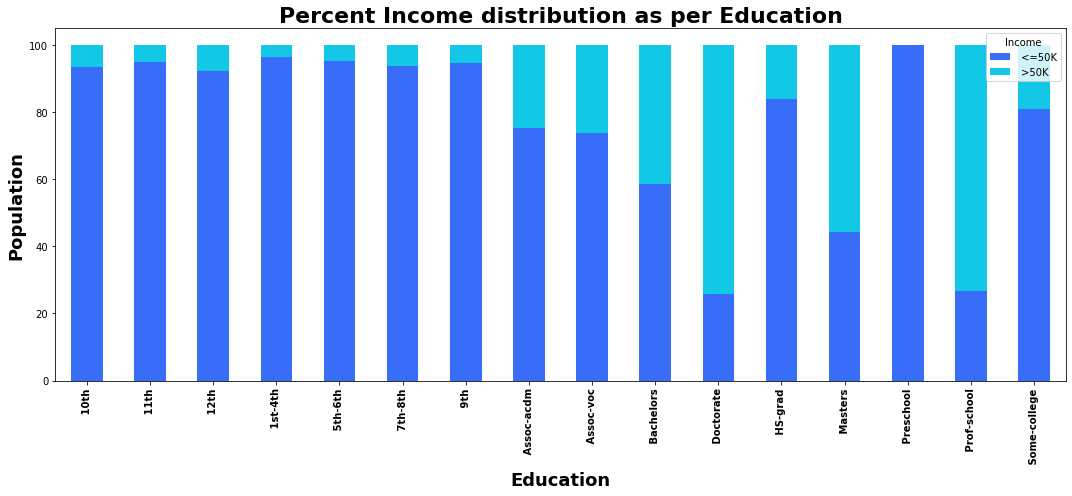

In [35]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

#### Observation:
- In terms of percentage 75 % of Doctorate people earn more than 50K dollars an years, followed by Prof- school.
- <b> So, Highly earning people most of times comes with Masters or Doctorate education background.</b>
- From crosstab we can see that private sector is highest recuriter for HS-Grad with 8305 people.
- Private sector is also major recurtier of highly eduacated people with masters, doctorate followed by local goverment.

## Impact of Marital Status on Income

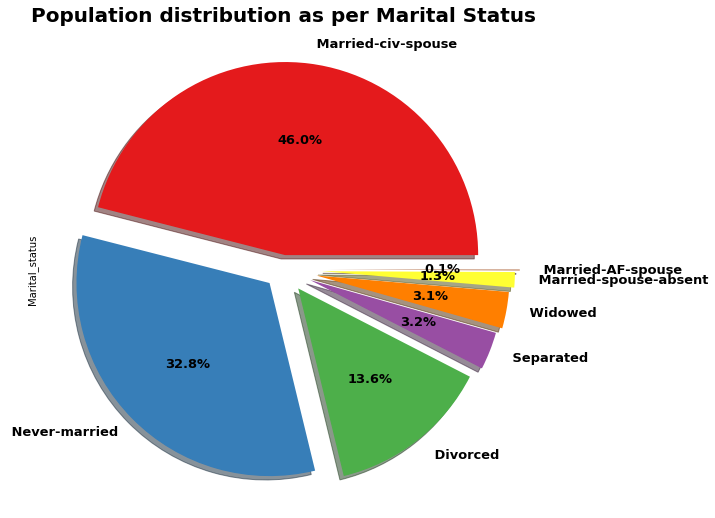

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],
                                             textprops ={'fontsize':13,'fontweight':'bold'},shadow=True)
plt.title('Population distribution as per Marital Status', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

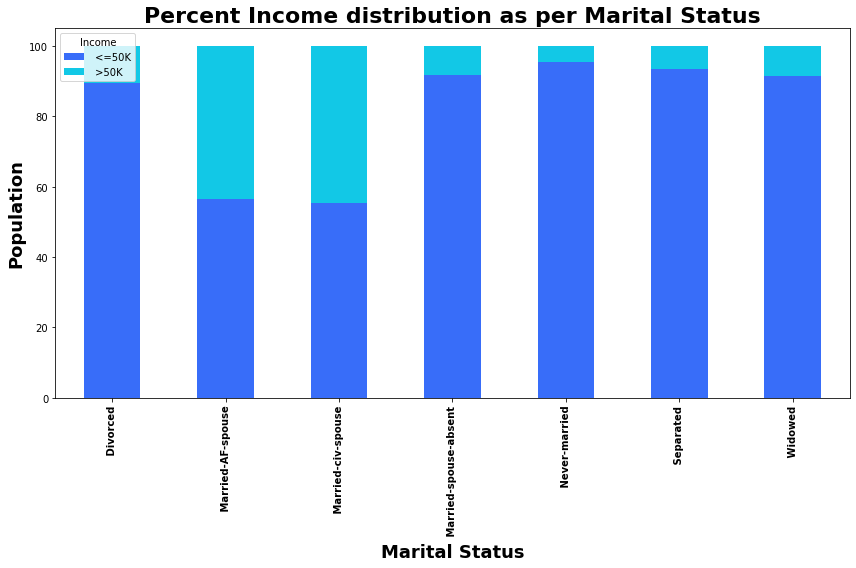

In [37]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=22, fontweight='bold')
plt.xlabel('Marital Status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [38]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


#### Observation :
<b> Married people are most like to earn more than 50K dollars an year.
    
Reason Might be Emotional support and stability of life than who are divorced/separated.</b>
- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

 ## Occupation VS Income

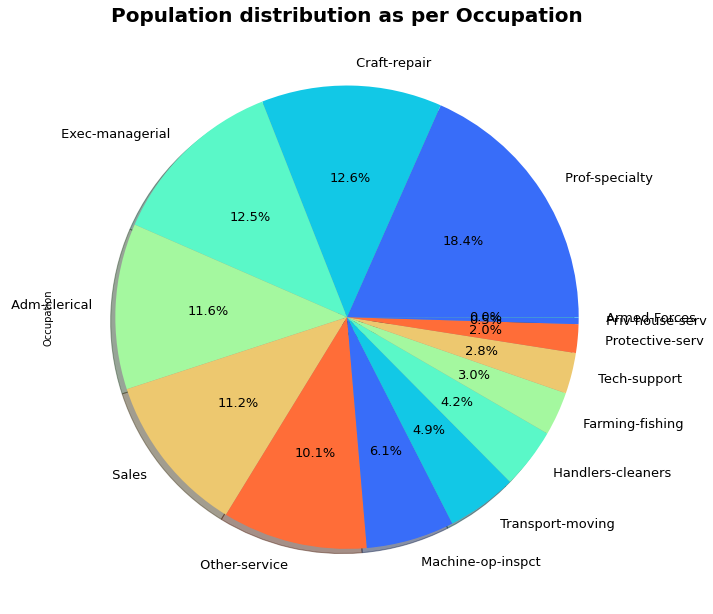

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Occupation', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

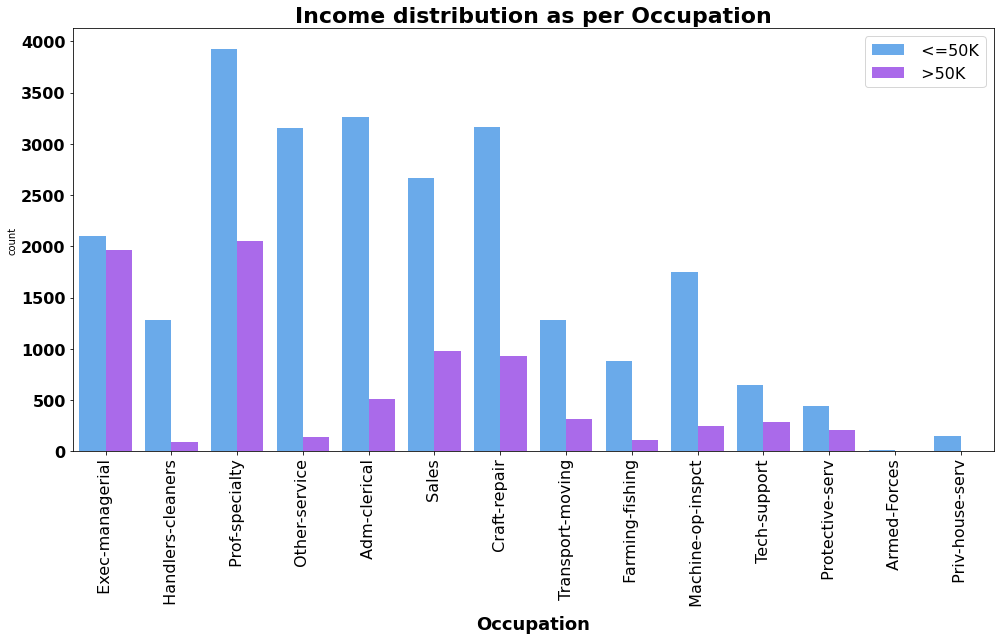

In [40]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Occupation'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

#### Observation :
- Exec-managerial role are equally likely to earn more than 50K dollars an year.
- Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.


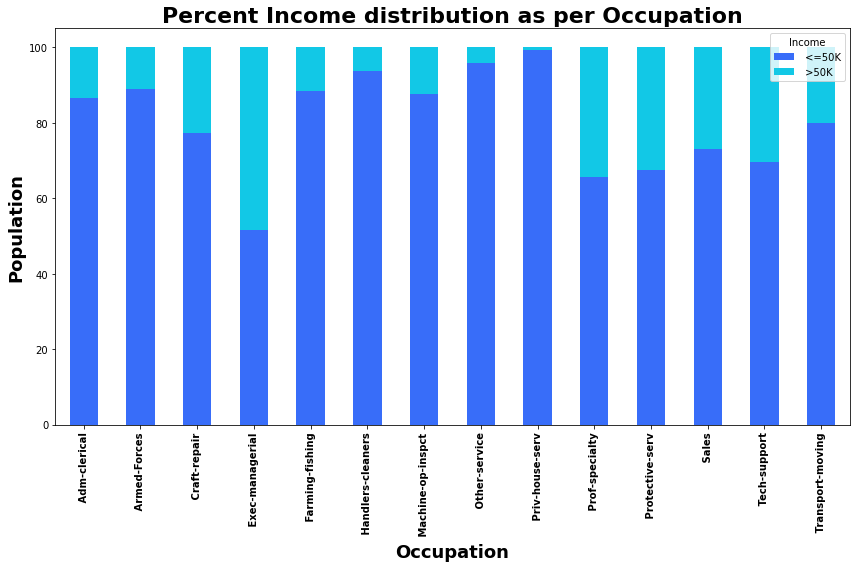

In [41]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Occupation'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [42]:
pd.crosstab(df['Occupation'],df["Income"], margins=True).style.background_gradient(cmap='winter_r')

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


#### Observation :
-  <b>Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.</b>
- If we talk in term of <b> percentage probablity Exective Managerial position have 50% chances to lead in Greater than 50K dollars Club.</b>
- There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
-<b> Minimum chances for Greater than 50K Club comes from Private House Service occupation </b> where 1/147 chance of getting more than 50K dollars an year.

<b> Let check where these different occupation fit with respect to Work class through crosstab. </b>

In [43]:
pd.crosstab(df['Occupation'],df["Workclass"], margins=True).style.background_gradient(cmap='winter_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


#### Observation :
- <b> Here is another surprising element, there are 7 peoples From Never Worked Category  with High earning Profession of Prof-speciality. Same from Without pay workclass we find 6 peoples with Exec-Managerial. Possibly they are working with unpaid internship profile.</b>

### Relationship VS Income

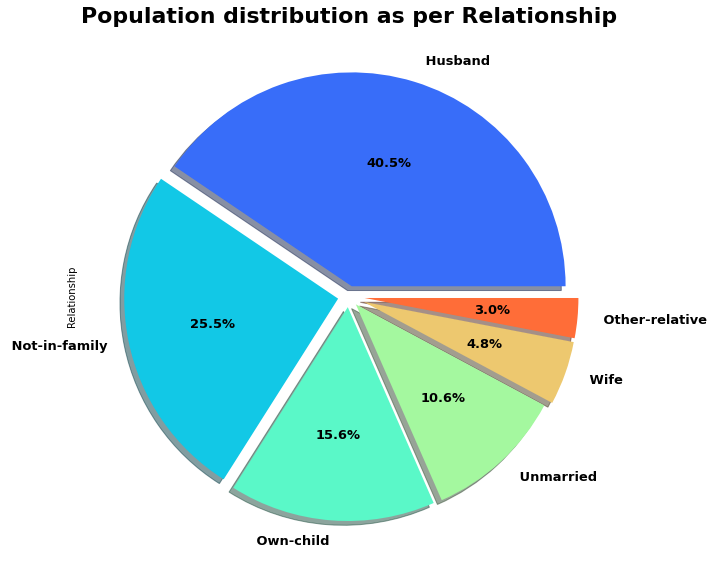

In [44]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

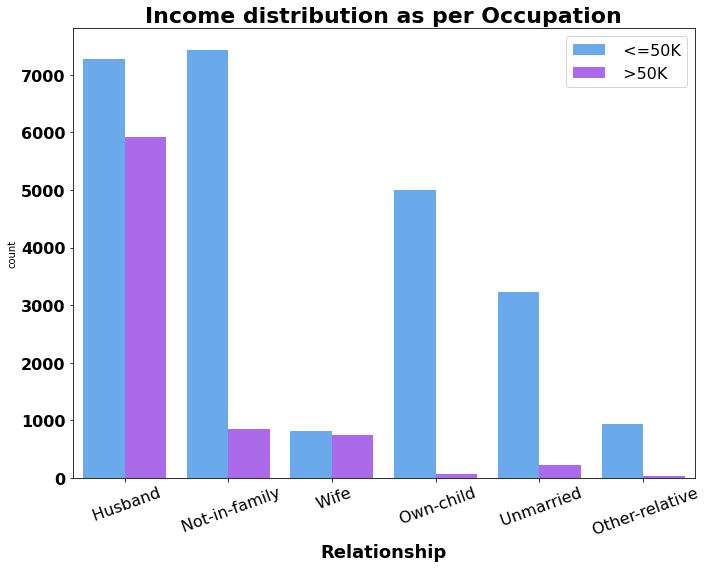

In [45]:
plt.figure(figsize=(10,8))
p = sns.countplot(df['Relationship'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

#### Observation:
- Wives are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Unmarried people earning more than 50K dollars an year.

### Race vs Income

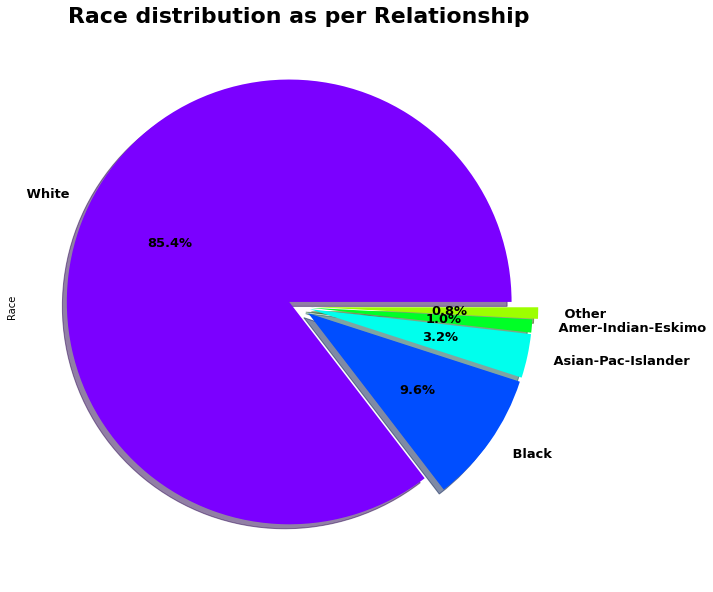

In [46]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(10,10))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Race distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

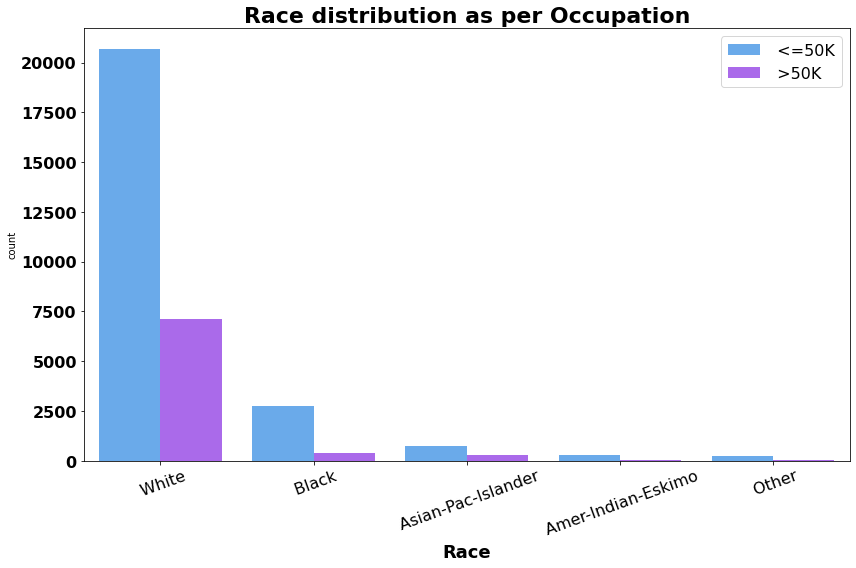

In [47]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Race'], hue=df['Income'], palette='cool')
plt.title('Race distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

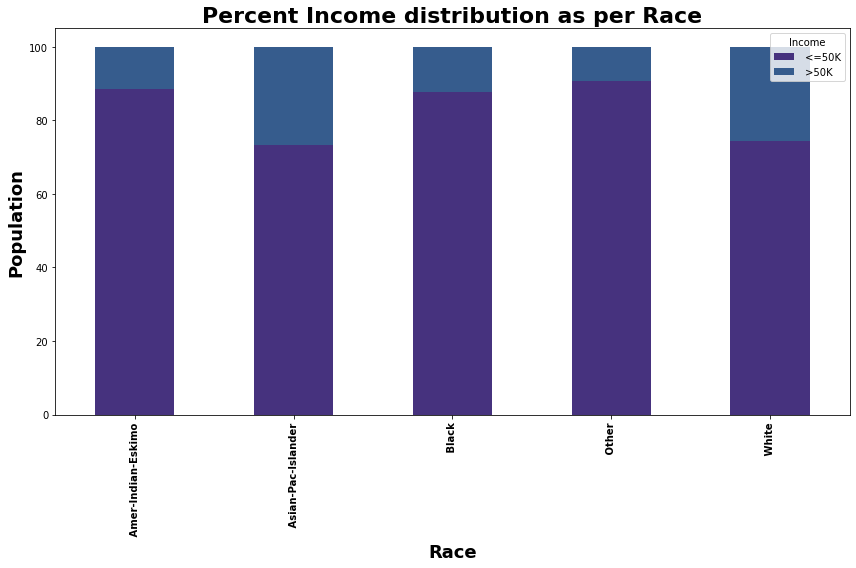

In [48]:
# Percentage Income distribution in terms of Education
sns.set_palette('viridis')
table = pd.crosstab(df['Race'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Race', fontsize=22, fontweight='bold')
plt.xlabel('Race', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

#### Observation:
- 85.4 % peoples are whites followed by black community with 9.6%.
- Maximum peoples in Greater than 50K Club are White.
-<b> This observation is biased as we have very less data of other races. So Nothing Meaningful & reliable insight we can draw from it.</b>

### Sex Vs Income

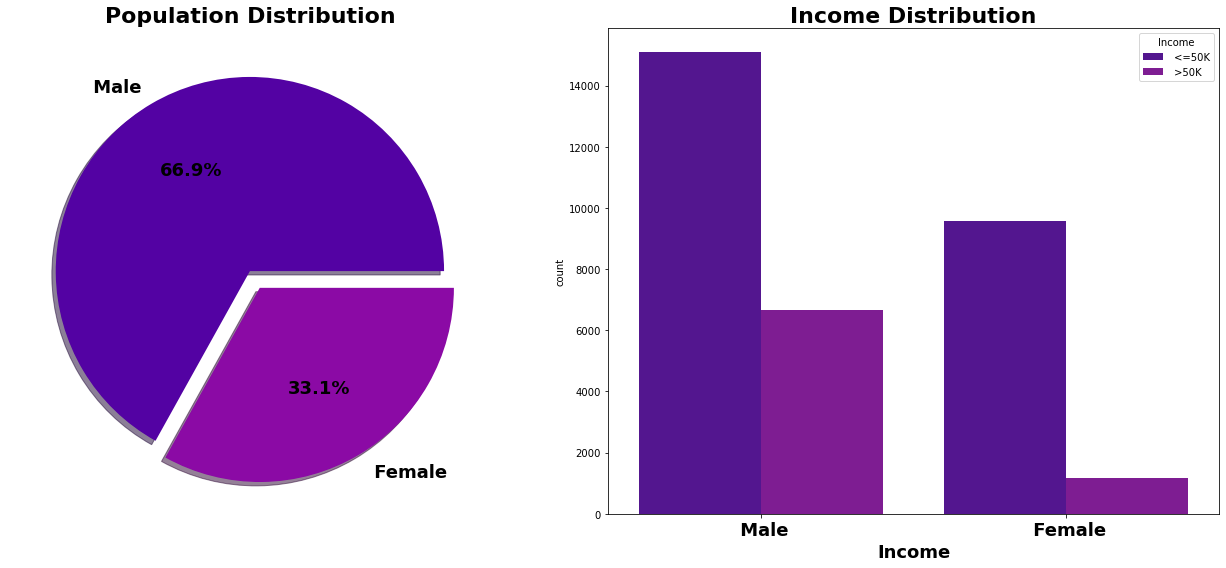

In [49]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Sex',hue=df['Income'] ,data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- Significant gap between male and female earnings.
- <b>Less than 10% Women in Greater Than 50K Dollar Club.</b>
- Around 33% of Men earning more than 50K dollars an year.

<b> Let find in which profession these women involved in . </b>

In [50]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True).style.background_gradient(cmap='winter_r')

#### Observation:
- Out of all population 33 % are womens. Inside that most of females work in Adm-clerical,Other-service,Prof-specialty.
- Same as in case of Men Maximum number in <u> Greater than 50K dollars Club in females comes from Prof-speciality,Exec-Managerial profession.</u>
- Maximum men work in Prof-Specialty.

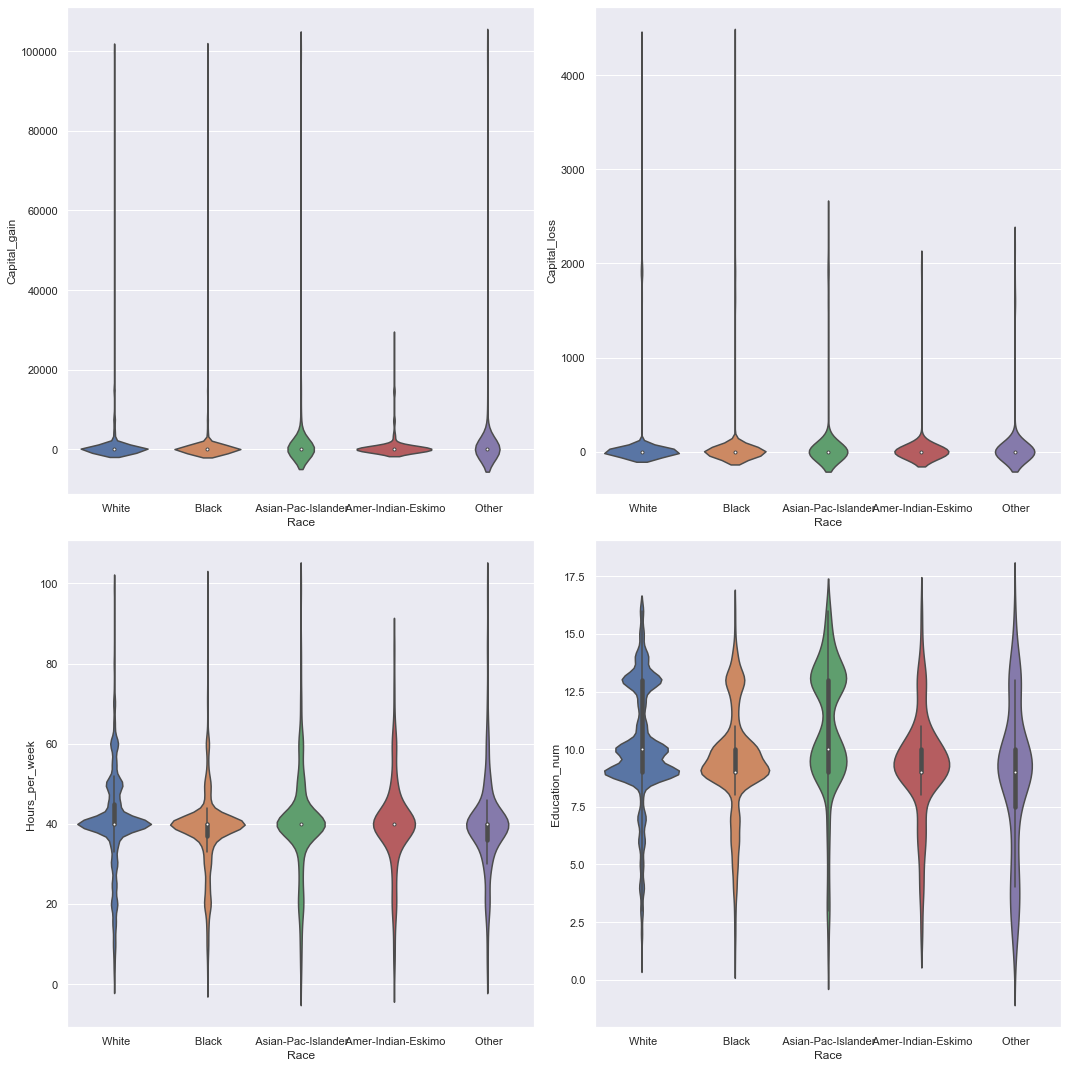

In [51]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df['Race'], y = df['Capital_gain'], data = df);
plt.subplot(2,2,2)
sns.violinplot(x = df['Race'], y = df['Capital_loss'], data = df);
plt.subplot(2,2,3)
sns.violinplot(x = df['Race'], y = df['Hours_per_week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x = df['Race'], y = df['Education_num'], data = df);

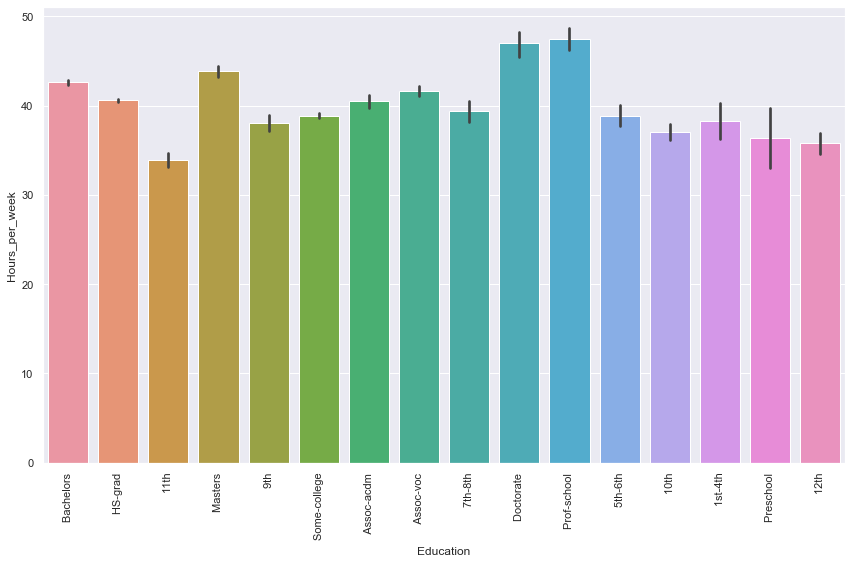

In [52]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

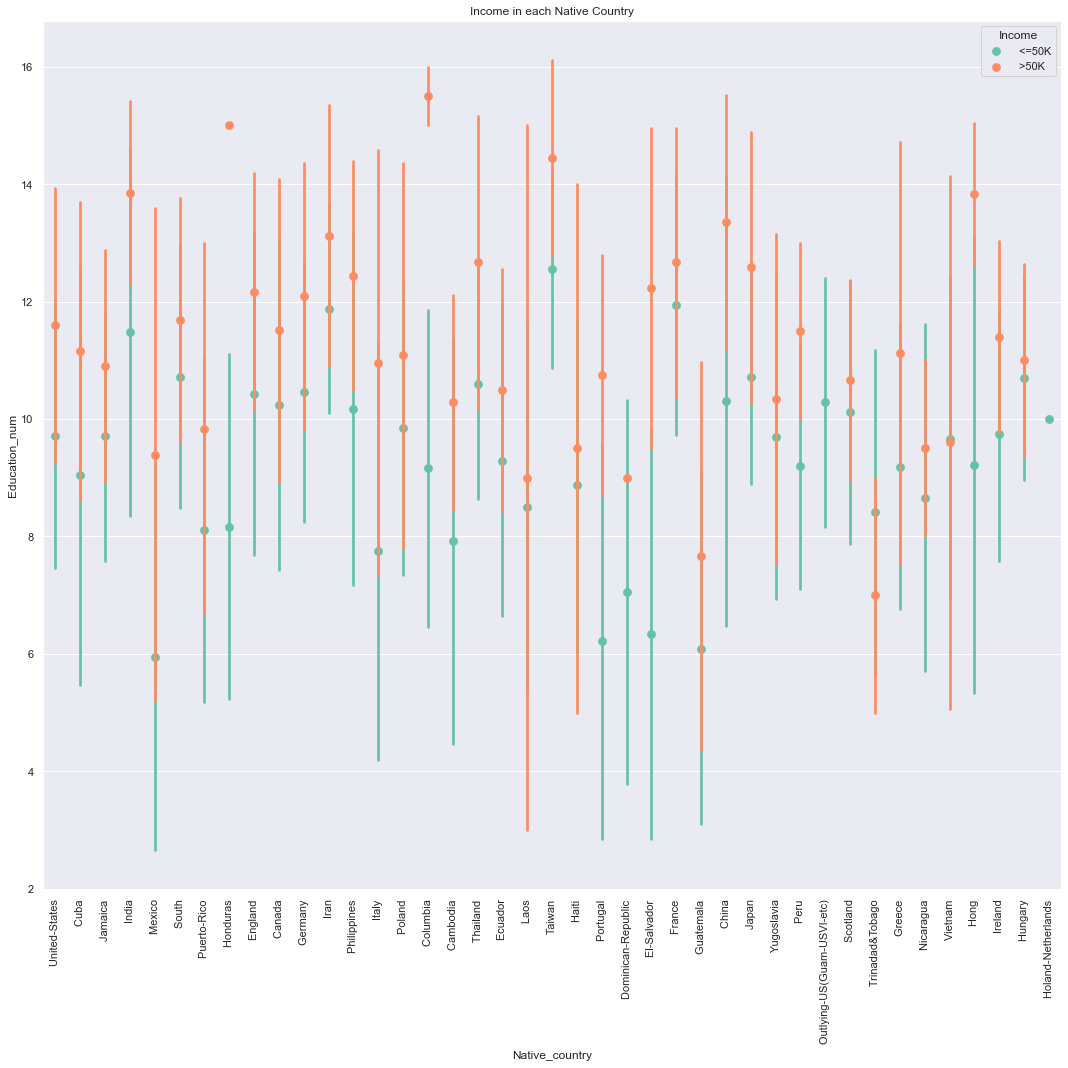

In [53]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()


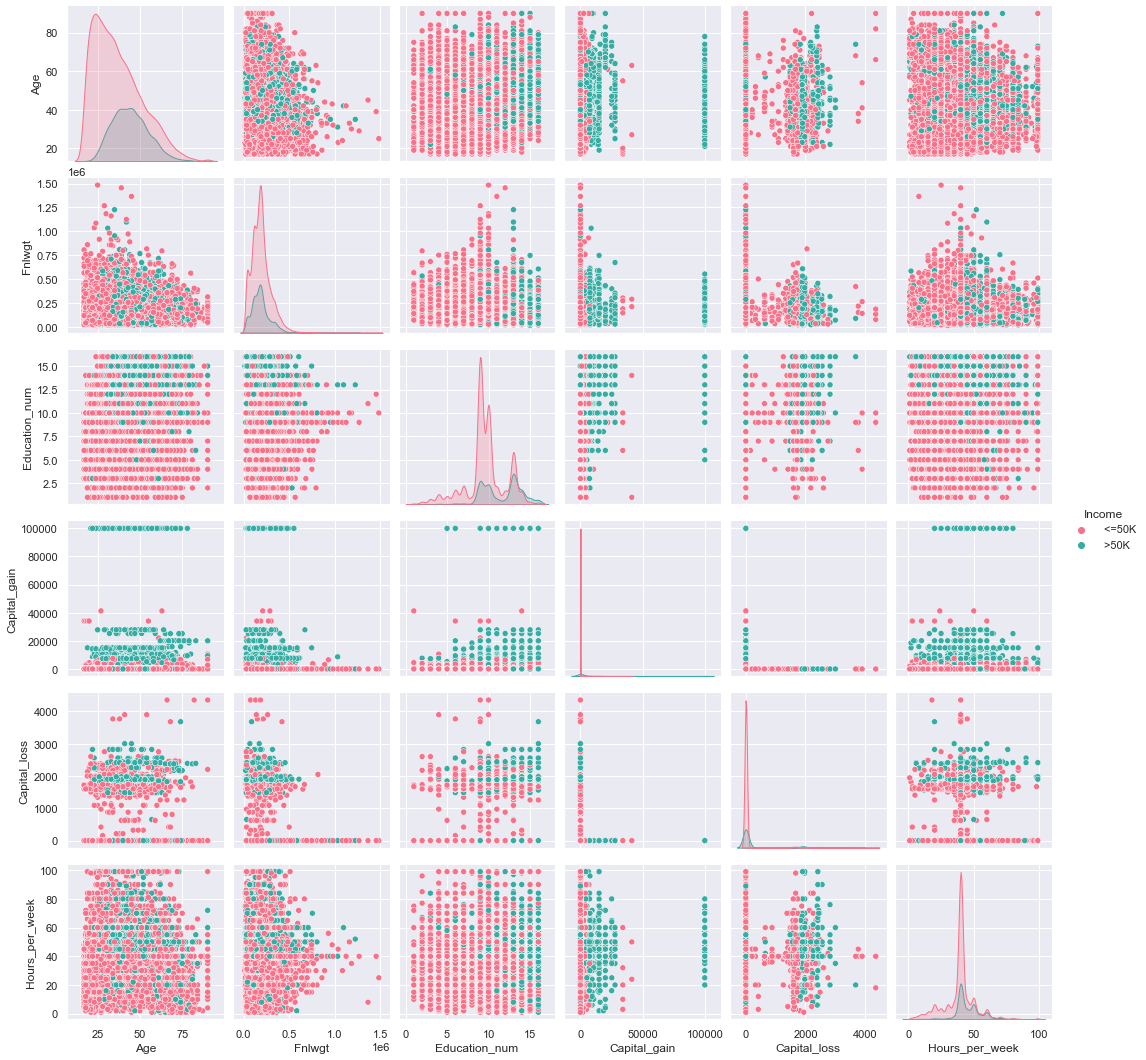

In [54]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="husl")

In [55]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


# Encoding categorical data

In [58]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category__data:
    df[i] = le.fit_transform(df[i])


In [59]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


# Feature selection and Engineering

## 1.  Detecti Outliers and Remove Outliers

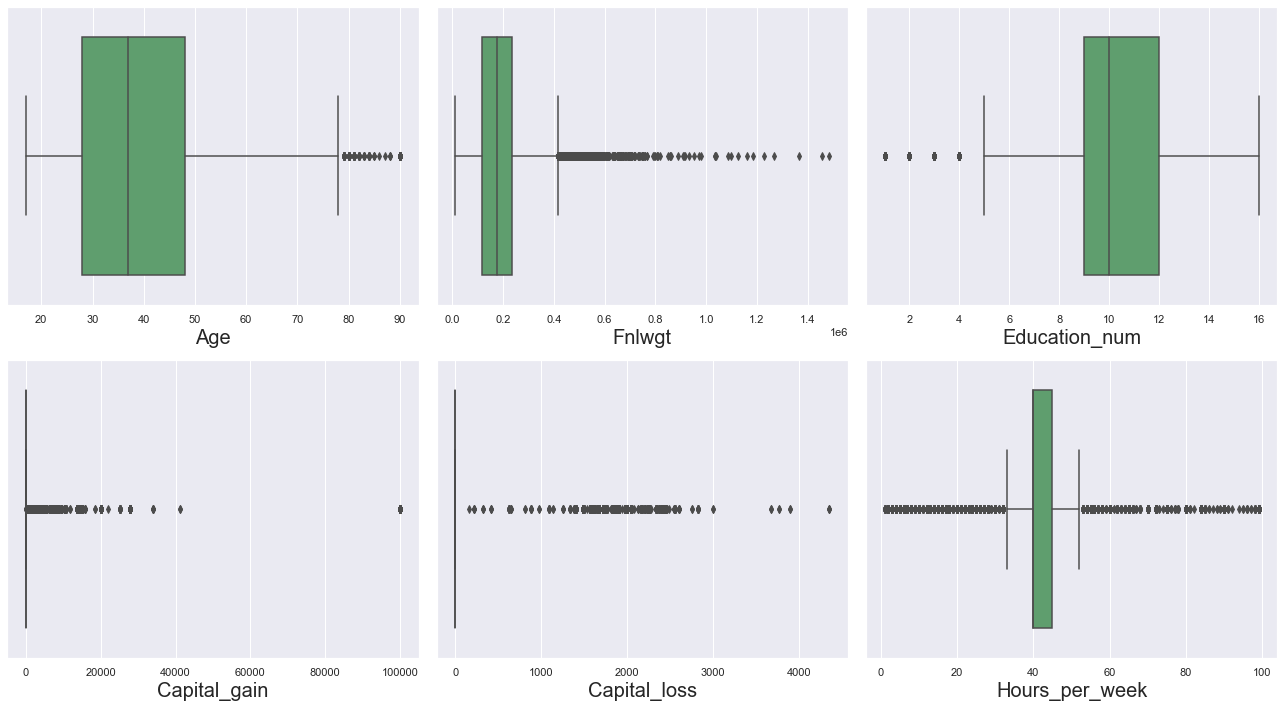

In [61]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical_data:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> From Boxplot we can see outliers exist dataset.</b>

In [62]:
# Droping unnecessary columns
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

### Outliers removal using Zscore method

In [73]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

TypeError: unsupported operand type(s) for /: 'str' and 'int'

##### Data Loss

In [74]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((32536-28061)/32536)*100,'%')

Percentage Data Loss : 13.753995574133269 %


<b><em> We are losing 13.75 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building. We have option to go for quantile method but by looking at boxplot we can say lower capping will result in useful data loss and eventually data loss will be more than zscore method.</em></b>

## 2.  Skewness of features

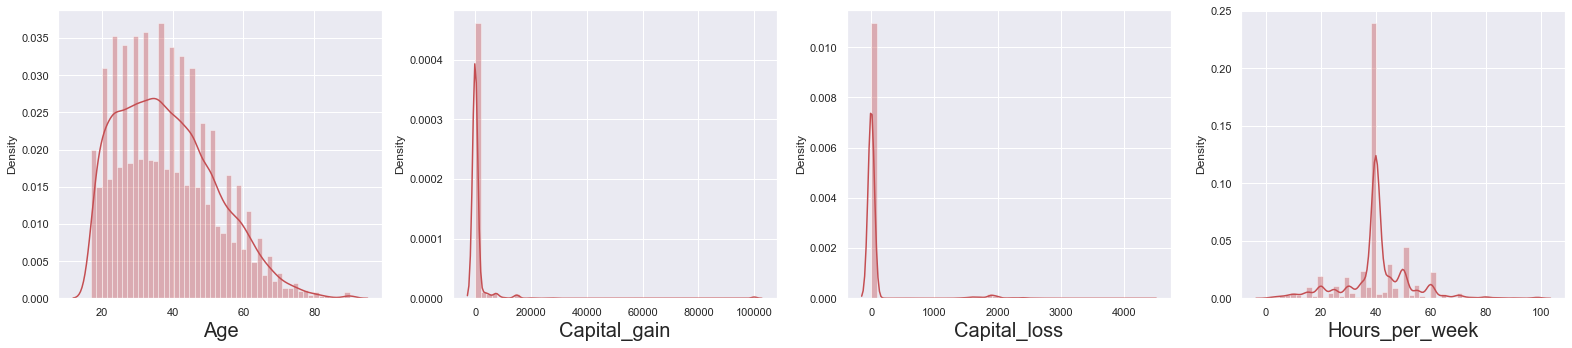

In [75]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [76]:
df.skew()

Age                0.557657
Workclass          0.075983
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.000407
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.247065
Income             1.211640
dtype: float64

#### Observation :
- Relationship,Sex,Native_country,Income are skewed but as they are categorical concept of skewness doesnot mean anything to it.
- Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them. There is no point in transforming it because at end data will be skewed.

<b> We will have option of scaling data to handle skewness in Capital gain and Capital loss.</b>

## 3. Corrleation 

In [77]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Education_num,0.036224,0.003412,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984
Capital_gain,0.077676,0.031497,0.122661,-0.043373,0.018013,-0.057945,0.011152,0.048486,1.000000,-0.031638,0.078408,0.008776,0.223340
Capital_loss,0.057745,0.002661,0.079901,-0.034134,0.009644,-0.061100,0.018916,0.045576,-0.031638,1.000000,0.054229,0.009337,0.150498


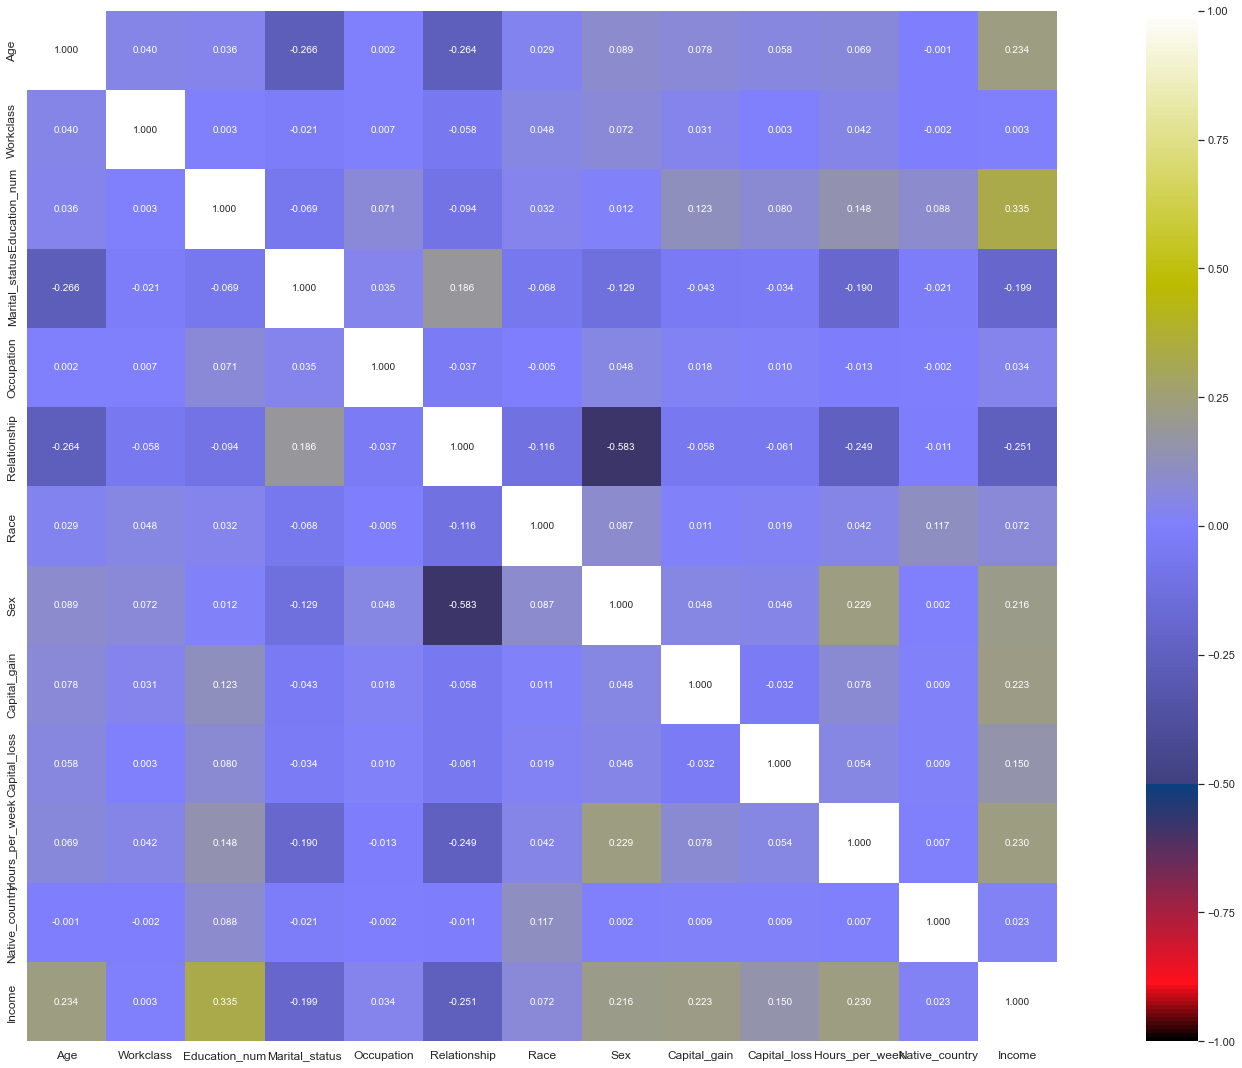

In [78]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

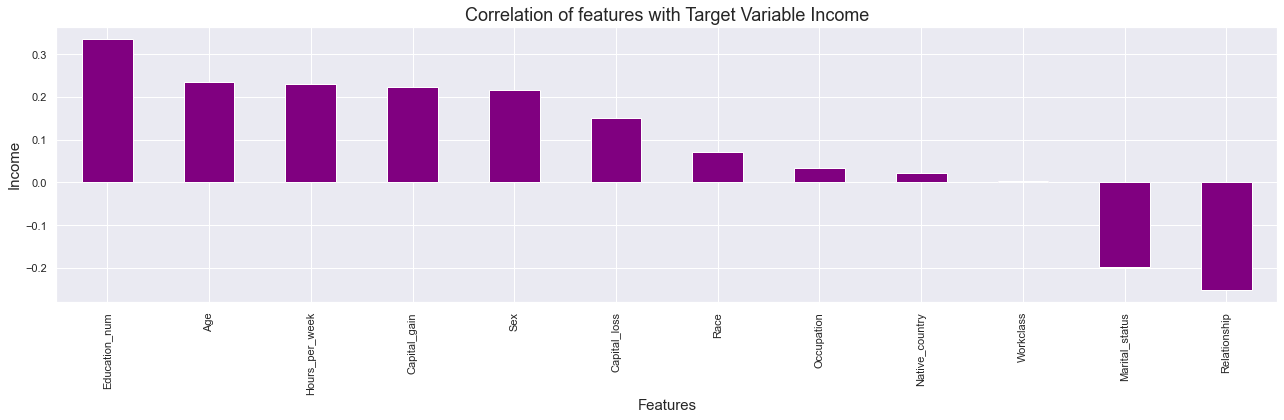

In [79]:
plt.figure(figsize = (18,6))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

#### Observation:
- Capital loss and workclass,occupation, native country, race are correlated with target variable with less than 10% correlation. <b> After checking Mulitcollinearity we will decide to drop these poorly correlated features or go for PCA. 
    
    As high or low Correlation doesnot mean its causation !!!</b>
- Between input features maximum correlation of -0.557 exist between sex and relationship.
- Capital gain is highly correlated with target variable.


 ## 4. Checking Multicollinearity between features using variance_inflation_factor

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

#### Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.  </b>


## 5. Balanceing Imbalanced target feature

In [81]:
df.Income.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [84]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

ValueError: could not convert string to float: '41-50'

In [ ]:
Y.value_counts()

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

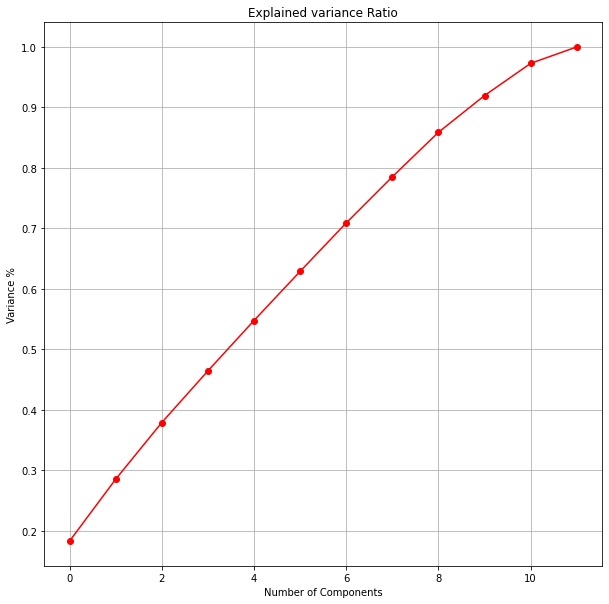

In [83]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data.  We shall pick the first 9 components for our prediction. </b>

In [85]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [86]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Machine Learning Model Building

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30473, 9)
Training target vector size: (30473,)
Test feature matrix size: (13061, 9)
Test target vector size: (13061,)


### Finding best Random state

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7770461679810122 on Random_state 28


In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=28, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7770461679810122


Confusion matrix of Logistics Regression : 
 [[5022 1543]
 [1369 5127]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      6565
           1       0.77      0.79      0.78      6496

    accuracy                           0.78     13061
   macro avg       0.78      0.78      0.78     13061
weighted avg       0.78      0.78      0.78     13061



### Finding Optimal value of n_neighbors for KNN

In [96]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.39839275902661153
RMSE value for k=  2 is: 0.42073215048845025
RMSE value for k=  3 is: 0.3925849735896683
RMSE value for k=  4 is: 0.4059129609955096
RMSE value for k=  5 is: 0.3954027214760637
RMSE value for k=  6 is: 0.3980082099417968
RMSE value for k=  7 is: 0.3971416130772601
RMSE value for k=  8 is: 0.39829665656253654
RMSE value for k=  9 is: 0.39829665656253654
RMSE value for k=  10 is: 0.39973576756152807
RMSE value for k=  11 is: 0.40078783145618385
RMSE value for k=  12 is: 0.40335853638388053


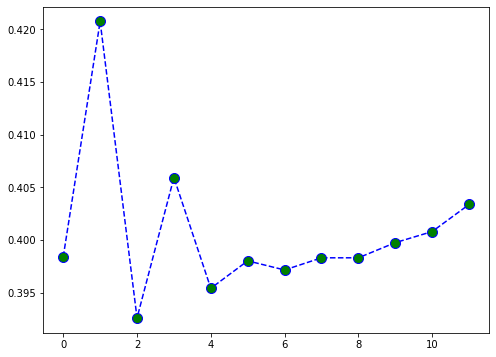

In [97]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Comment- 
At k=3, we get the minimum RMSE value which approximately 0.3925849735896683, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case


## Applying other classification algorithm

In [104]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7770461679810122


Confusion matrix : 
 [[5022 1543]
 [1369 5127]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      6565
           1       0.77      0.79      0.78      6496

    accuracy                           0.78     13061
   macro avg       0.78      0.78      0.78     13061
weighted avg       0.78      0.78      0.78     13061



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8248219891279381


Confusion matrix : 
 [[4907 1658]
 [ 630 5866]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      6565
           1       0.78      0.90      0.84      6496

    accuracy                           0.82     13061
   macro avg       0.83      0.83      0.82     13061
weighted avg       0.83      0.82      0

# CrossValidation :

In [100]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.76088205 0.7658206  0.76019295 0.77822442 0.77486791]
Mean Score : 0.7679975851132925
Std deviation : 0.0073221837927897465




Cross Validation Score SVC() :

Score : [0.81313885 0.82094866 0.82267141 0.83254852 0.83275902]
Mean Score : 0.824413294108574
Std deviation : 0.007456324590903305




Cross Validation Score GaussianNB() :

Score : [0.70322729 0.71873205 0.7181578  0.7183875  0.72685504]
Mean Score : 0.717071938785862
Std deviation : 0.00765570720027397




Cross Validation Score DecisionTreeClassifier() :

Score : [0.79166188 0.81727346 0.82864362 0.83587918 0.83275902]
Mean Score : 0.8212434307802174
Std deviation : 0.016077346578997315




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.81463191 0.83966923 0.85138394 0.8593086  0.8550425 ]
Mean Score : 0.8440072365338102
Std deviation : 0.01607515474683319




Cross Validation Score RandomForestClassifier() :

Score : [0.82852877 0.8523027

# Hyper Parameter Tuning : GridSearchCV

In [111]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [116]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.849 total time=   4.6s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.844 total time=   3.5s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.857 total time=   3.1s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.853 total time=   3.3s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

[CV 5/5; 8/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=150;, score=0.842 total time=   4.3s
[CV 1/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 1/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.844 total time=   6.6s
[CV 2/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 2/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.842 total time=   7.2s
[CV 3/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 3/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.849 total time=   7.1s
[CV 4/5; 9/54] START criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200
[CV 4/5; 9/54] END criterion=gini, max_depth=20, min_samples_split=8, n_estimators=200;, score=0.850 total time=   7.5s
[CV 5/5; 9/54] START criterion=gini, max_dep

[CV 4/5; 16/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.854 total time=   5.6s
[CV 5/5; 16/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100
[CV 5/5; 16/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.849 total time=   4.6s
[CV 1/5; 17/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150
[CV 1/5; 17/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.855 total time=   7.7s
[CV 2/5; 17/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150
[CV 2/5; 17/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.851 total time=   6.9s
[CV 3/5; 17/54] START criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150
[CV 3/5; 17/54] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.858 total time=   4.8s
[CV 4/5; 17/54] START criterion=gin

[CV 3/5; 24/54] END criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200;, score=0.859 total time=  11.1s
[CV 4/5; 24/54] START criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200
[CV 4/5; 24/54] END criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200;, score=0.852 total time=   8.8s
[CV 5/5; 24/54] START criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200
[CV 5/5; 24/54] END criterion=gini, max_depth=40, min_samples_split=5, n_estimators=200;, score=0.851 total time=  11.2s
[CV 1/5; 25/54] START criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100
[CV 1/5; 25/54] END criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100;, score=0.854 total time=   4.1s
[CV 2/5; 25/54] START criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100
[CV 2/5; 25/54] END criterion=gini, max_depth=40, min_samples_split=8, n_estimators=100;, score=0.849 total time=   4.4s
[CV 3/5; 25/54] START criterion=gin

[CV 2/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.842 total time=   5.4s
[CV 3/5; 32/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150
[CV 3/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.854 total time=   4.2s
[CV 4/5; 32/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150
[CV 4/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.848 total time=   4.3s
[CV 5/5; 32/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150
[CV 5/5; 32/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=150;, score=0.844 total time=   5.3s
[CV 1/5; 33/54] START criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=200
[CV 1/5; 33/54] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=200;, score=0.844 total time=   5.4s
[CV 2/5;

[CV 5/5; 39/54] END criterion=entropy, max_depth=30, min_samples_split=3, n_estimators=200;, score=0.852 total time=   8.3s
[CV 1/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 1/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.854 total time=   3.8s
[CV 2/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 2/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.848 total time=   4.6s
[CV 3/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 3/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.860 total time=   3.8s
[CV 4/5; 40/54] START criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100
[CV 4/5; 40/54] END criterion=entropy, max_depth=30, min_samples_split=5, n_estimators=100;, score=0.855 total time=   4.0s
[CV 5/5;

[CV 3/5; 47/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150;, score=0.858 total time=   6.6s
[CV 4/5; 47/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150
[CV 4/5; 47/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150;, score=0.855 total time=   6.7s
[CV 5/5; 47/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150
[CV 5/5; 47/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=150;, score=0.849 total time=   6.6s
[CV 1/5; 48/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200
[CV 1/5; 48/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200;, score=0.853 total time=   9.0s
[CV 2/5; 48/54] START criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200
[CV 2/5; 48/54] END criterion=entropy, max_depth=40, min_samples_split=3, n_estimators=200;, score=0.851 total time=   8.5s
[CV 3/5;

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [123]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 8,
 'n_estimators': 200}

# Final Model

In [121]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split= 8)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8614194931475385


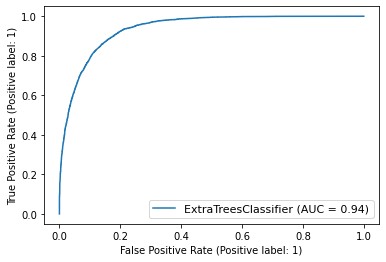

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8615895563125846


In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving model

In [120]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']